<a href="https://colab.research.google.com/github/aish7iitkgp/Project-2/blob/main/Project_2_21BT10004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE FILE STRUCTURE REQUIRED FOR THIS CODE IS EXPLAINED IN DETAIL IN THE README FILE.... PLEASE GO THROUGH THAT TO RUN THIS CODE PROPERLY....

#UNZIP THE FNA FOLDER WHICH CONTAINS BENIGN AND MALIGNANT DATA

In [1]:
!unzip FNA.zip

Archive:  FNA.zip
  inflating: FNA/.DS_Store           
   creating: FNA/benign/
  inflating: FNA/benign/.DS_Store    
 extracting: FNA/benign/10253_idx5_x1001_y1001_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1051_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1101_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1151_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1201_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1251_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1301_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1351_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1501_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1551_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y1701_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y351_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y401_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y451_class0.png  
 extracting: FNA/benign/10253_idx5_x1001_y50

# FUNCTION FOR LOADING IMAGES FROM BENIGN AND MALIGNANT FILES.... 'os' IS USED TO TRAVERSE WITHIN DIRECTORY

In [2]:
import os
import cv2
import numpy as np

def load_images(data_path):
    images = []
    labels = []

    # Assuming benign class is labeled as 0 and malignant as 1
    class_labels = {'benign': 0, 'malignant': 1}

    for class_name, label in class_labels.items():
        class_path = os.path.join(data_path, class_name)
        for filename in os.listdir(class_path):
            if filename.endswith(".png"):
                file_path = os.path.join(class_path, filename)
                # Read and resize image
                img = cv2.imread(file_path)
                img = cv2.resize(img, (224, 224))  # Assuming input image size is 224x224
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Usage example:
X, y = load_images('FNA')

# Continue with the rest of the preprocessing and model training code...


# TRAIN-TEST SPLIT

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize pixel values to be between 0 and 1
# X_train = X_train.astype('float32') / 255
# X_val = X_val.astype('float32') / 255

# Use ImageDataGenerator for real-time data augmentation
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

# TRAINING THE CNN MODEL

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

img_height, img_width = 224, 224

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
44/44 [==============================] - 24s 499ms/step - loss: 23.8057 - accuracy: 0.8477 - val_loss: 29.0985 - val_accuracy: 0.6435
Epoch 2/10
44/44 [==============================] - 21s 468ms/step - loss: 11.9593 - accuracy: 0.8803 - val_loss: 6.5090 - val_accuracy: 0.8754
Epoch 3/10
44/44 [==============================] - 20s 467ms/step - loss: 6.2790 - accuracy: 0.8731 - val_loss: 70.0509 - val_accuracy: 0.3565
Epoch 4/10
44/44 [==============================] - 20s 462ms/step - loss: 5.3955 - accuracy: 0.8818 - val_loss: 93.3155 - val_accuracy: 0.3565
Epoch 5/10
44/44 [==============================] - 23s 526ms/step - loss: 2.2709 - accuracy: 0.8760 - val_loss: 209.1203 - val_accuracy: 0.3565
Epoch 6/10
44/44 [==============================] - 22s 502ms/step - loss: 2.4434 - accuracy: 0.8753 - val_loss: 260.0090 - val_accuracy: 0.3565
Epoch 7/10
44/44 [==============================] - 21s 475ms/step - loss: 1.4397 - accuracy: 0.8528 - val_loss: 38.3976 - val_accura

# PLOTTING

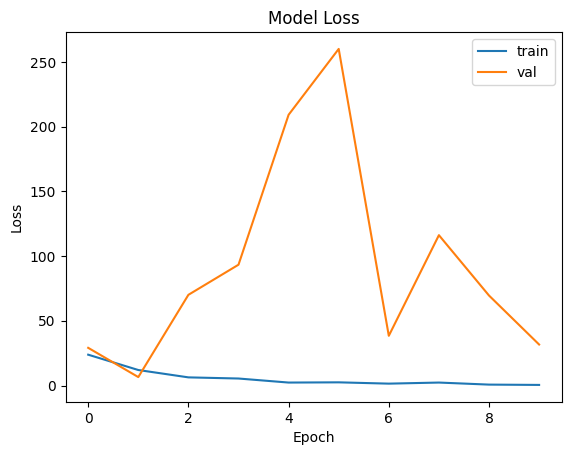

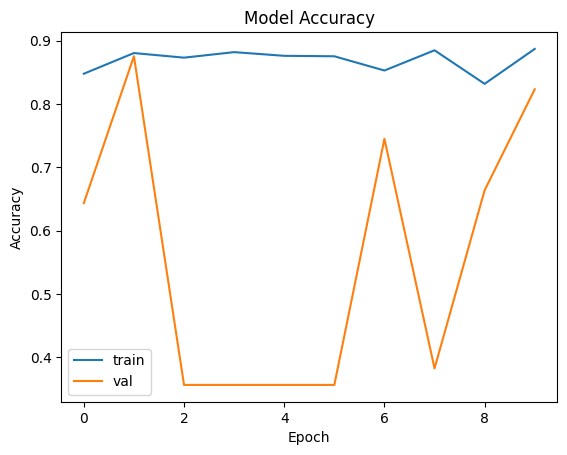

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
!unzip test.zip

Archive:  test.zip
 extracting: test/eight.png          
 extracting: test/eleven.png         
 extracting: test/five.png           
 extracting: test/four.png           
 extracting: test/fourteen.png       
 extracting: test/nine.png           
 extracting: test/one.png            
 extracting: test/seven.png          
 extracting: test/six.png            
 extracting: test/ten.png            
 extracting: test/thirteen.png       
 extracting: test/three.png          
 extracting: test/twelve.png         
 extracting: test/two.png            


# CONVERTING PROBABILITIES TO LABELS

In [8]:
def convert_probabilities_to_labels(predictions):
    threshold = 0.5  # You can adjust this threshold as needed
    labels = []

    for probability in predictions:
        if probability[0] > threshold:
            labels.append('Benign')
        else:
            labels.append('Malignant')

    return labels


# FUNCTION TO LOAD THE UNLABELLED IMAGES FROM THE TEST FOLDER AND PREDICTION USING THE MODEL

In [9]:
def load_test_images(folder_path):
    images = []
    image_names = []  # To keep track of image names

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(".png"):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            img = cv2.resize(img, (224, 224))  # Resize to the desired dimensions

            images.append(img)
            image_names.append(filename)  # Save the image name for later reference

    return np.array(images), image_names

# Load test images
test_images, test_image_names = load_test_images('test')
test_generator = datagen.flow(test_images, batch_size=1, shuffle=False)
# Assuming you have a trained model named 'model'
predictions = model.predict(test_generator)

# Assuming you have a function to convert probabilities to class labels
predicted_labels = convert_probabilities_to_labels(predictions)

# Now, you can associate predictions with image names
for i in range(len(test_image_names)):
    print(f"Image: {test_image_names[i]}, Prediction: {predicted_labels[i]}")


14/14 [==============================] - 0s 21ms/step
Image: ten.png, Prediction: Benign
Image: nine.png, Prediction: Benign
Image: six.png, Prediction: Malignant
Image: five.png, Prediction: Malignant
Image: thirteen.png, Prediction: Benign
Image: seven.png, Prediction: Benign
Image: eleven.png, Prediction: Benign
Image: fourteen.png, Prediction: Benign
Image: three.png, Prediction: Benign
Image: twelve.png, Prediction: Malignant
Image: four.png, Prediction: Benign
Image: two.png, Prediction: Malignant
Image: one.png, Prediction: Malignant
Image: eight.png, Prediction: Benign
